In [1]:
import sys
import os
import pathlib
import shutil
import time
local_path = os.path.abspath('')
module_path = pathlib.Path(local_path)
root_path = module_path.parent
root_path2 = root_path.parent
root_path3 = root_path2.parent
path1=os.path.join(root_path2)
path2=os.path.join(root_path3)
sys.path.append(path1)
sys.path.append(path2)
example_path =os.path.join(module_path.parent.parent,"Examples","Examples_Files")

In [2]:
from pyaedt.generic.TouchstoneParser import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = read_touchstone(os.path.join(example_path,'SSN_ssn.s6p'))

In [4]:
rl_list = get_return_losses(data.ports)
il_list = get_insertion_losses_from_prefix(data.ports,"U1", "U7")
fext_list = get_fext_xtalk_from_prefix(data.ports,"U1","U7")
next_list = get_next_xtalk(data.ports,"U1")



In [5]:
worst_rl, global_mean = get_worst_curve_from_solution_data(data,freq_min=1, freq_max=20,worst_is_higher=True,curve_list=rl_list)
worst_il, mean2 = get_worst_curve_from_solution_data(data,freq_min=1, freq_max=20,worst_is_higher=False,curve_list=il_list)
worst_fext, mean3 = get_worst_curve_from_solution_data(data,freq_min=1, freq_max=20,worst_is_higher=True,curve_list=fext_list)
worst_next, mean4 = get_worst_curve_from_solution_data(data,freq_min=1, freq_max=20,worst_is_higher=True,curve_list=next_list)

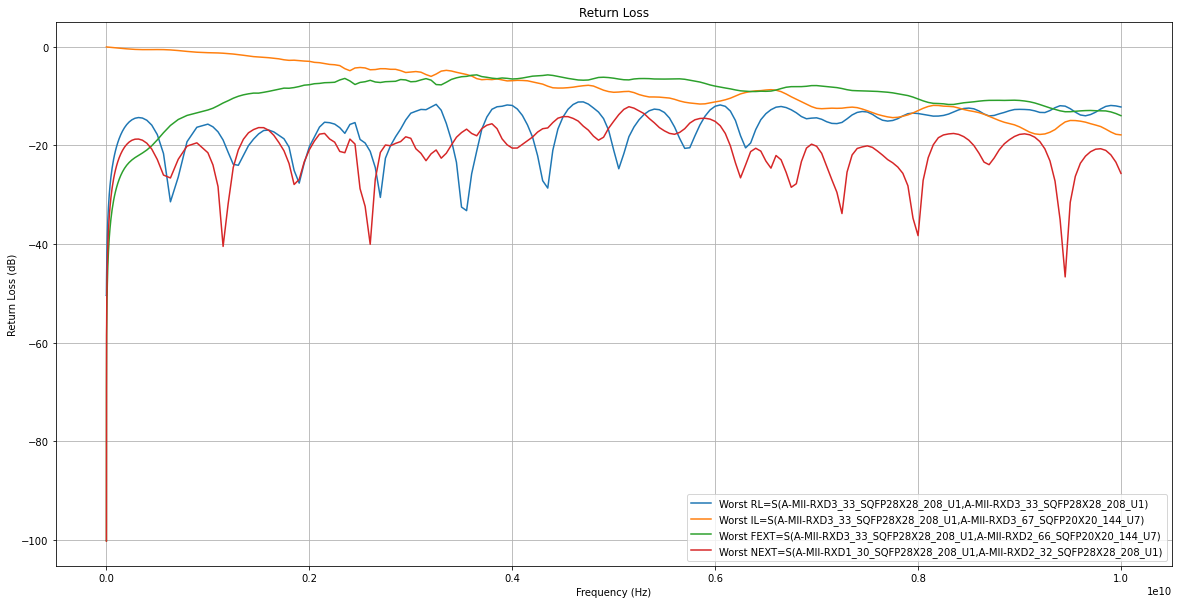

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set(xlabel='Frequency (Hz)', ylabel='Return Loss (dB)', title='Return Loss')
ax.grid()
mag_data = 20*np.log10(np.array(data.solutions_data_mag[worst_rl]))
freq_data = np.array([i*1e9 for i in data.sweeps["Freq"]])
ax.plot(freq_data, mag_data, label=worst_rl)
mag_data2 = 20*np.log10(np.array(data.solutions_data_mag[worst_il]))
ax.plot(freq_data, mag_data2, label=worst_il)
mag_data3 = 20*np.log10(np.array(data.solutions_data_mag[worst_fext]))
ax.plot(freq_data, mag_data3, label=worst_fext)
mag_data4 = 20*np.log10(np.array(data.solutions_data_mag[worst_next]))
ax.plot(freq_data, mag_data4,label=worst_next)
ax.legend(["Worst RL="+worst_rl,"Worst IL="+worst_il,"Worst FEXT="+worst_fext,"Worst NEXT="+worst_next])
plt.show()


